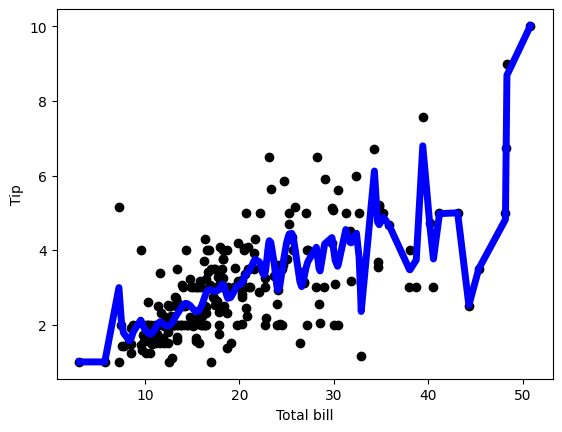

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Kernel(point,xmat,k):
    m,n = np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
      diff=point-X[j]
      weights[j,j]=np.exp(diff*diff.T/(-2.0*k*k**2))
    return weights

def LW(point,xmat,ymat,k):
    wei=Kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def LWR(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
      ypred[i]=xmat[i]*LW(xmat[i], xmat,ymat,k)
    return ypred

data=pd.read_csv('tips.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)

mbill=np.mat(bill)
mtip=np.mat(tip)

m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))

ypred=LWR(X,mtip,0.5)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='black')
ax.plot(xsort[:,1],ypred[SortIndex],color='blue',linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()
